In [260]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [261]:
#utility_data = pd.read_csv('https://raw.githubusercontent.com/WalePhenomenon/climate_change/master/fuel_ferc1.csv',error_bad_lines=False)
utility_data = pd.read_csv('Fuel_utility.csv')
utility_data.head(15)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_fuel_cost_per_unit,total_cost,mmbtu_produced,total_fuel_cost_burned
0,0,0,0,0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590000,18.590,18.530,1.121,37.120,1.996124e+08,8.921254e+07,9.996752e+07
1,1,1,1,1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592000,18.580,18.530,1.120,37.110,3.891705e+08,1.739994e+08,1.948474e+08
2,2,2,2,2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130000,39.720,38.120,1.650,77.840,2.318607e+08,7.187562e+07,1.183133e+08
3,3,3,3,3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950000,47.210,45.990,1.970,93.200,3.485199e+08,8.956064e+07,1.765410e+08
4,4,4,4,4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000000,2.770,2.770,2.570,5.540,2.245528e+05,4.053300e+04,1.122764e+05
5,5,5,5,5,5,f1_fuel_1994_12_2_0_13,2,1994,e. c. gaston-unit 5,coal,ton,2124933.0,23.922000,44.240,43.250,1.850,87.490,1.859104e+08,5.083265e+07,9.400704e+07
6,6,6,6,6,6,f1_fuel_1994_12_2_1_1,2,1994,joseph m. farley,nuclear,kgU,2260.0,0.064094,28.770,0.000,0.450,28.770,6.502020e+04,1.448524e+02,6.502020e+04
7,7,7,7,7,7,f1_fuel_1994_12_2_1_10,2,1994,resondent's portion,coal,ton,5372133.0,24.840000,58.540,55.130,2.360,113.670,6.106504e+08,1.334438e+08,3.144847e+08
8,8,8,8,8,8,f1_fuel_1994_12_2_2_10,2,1994,respondent's portion,coal,ton,817520.0,24.290000,33.970,34.650,1.400,68.620,5.609822e+07,1.985756e+07,2.777115e+07
9,9,9,9,9,9,f1_fuel_1994_12_4_0_1,4,1994,units 1-3,coal,ton,1471233.0,22.484000,28.730,28.110,1.278,56.840,8.362488e+07,3.307920e+07,4.226852e+07


In [262]:
utility_data.to_csv('Fuel_utility.csv')

In [263]:
#'Record_id' : record id
#'Utility_id_ferc1': Utility id assigned by the FERC
#'Report_year': year of report
#'Plant_name_ferc1': the name of the plant
#'Fuel_type_code_pudl': the type of fuel
#'Fuel_unit': the unit of fuel
#'Fuel_qty_burned': the quantity of fuel burned
#'Fuel_mmbtu_per_unit': the measure of energy per unit
#'fuel_cost_per_unit_burned': the fuel cost per unit burned
#'Fuel_cost_per_unit_delivered': the cost of fuel delivered per unit
#'fuel_cost_per_mmbtu': the cost of fuel per mmbtu

## Inputing null Values
First, lets check the dataset for missing values.

In [264]:
utility_data.isna().sum()

Unnamed: 0                       0
Unnamed: 0.1                     0
Unnamed: 0.1.1                   0
Unnamed: 0.1.1.1                 0
Unnamed: 0.1.1.1.1               0
record_id                        0
utility_id_ferc1                 0
report_year                      0
plant_name_ferc1                 0
fuel_type_code_pudl              0
fuel_unit                       36
fuel_qty_burned                  0
fuel_mmbtu_per_unit              0
fuel_cost_per_unit_burned        0
fuel_cost_per_unit_delivered     0
fuel_cost_per_mmbtu              0
total_fuel_cost_per_unit         0
total_cost                       0
mmbtu_produced                   0
total_fuel_cost_burned           0
dtype: int64

The Fuel unit is the only column with 180 missing values. I can also see that the value of this column depends strictly on the fuel_type_code. I shall attempt filling up the missing values with the appropriate values given their respective fuel_types

I noticed in the data that some power_plants had 0 value for the fuel_cost_per_unit_burned and fuel_cost_per_unit_delivered. I shall attempt to calculate that from the fuel_mmbtu_per_unit.
The fuel_mmbtu_per_unit is gotten by dividing the fuel_cost_per_unit_burned by the mmbtu_per_unit.

In [265]:
# calculate fuel_cost_per_unit_burned.
def cal_cost(row):
    if (row['fuel_cost_per_unit_burned'] == 0.0) and (row['fuel_cost_per_mmbtu'] != 0.0):
        row['fuel_cost_per_unit_burned'] = row['fuel_cost_per_mmbtu'] * row['fuel_mmbtu_per_unit']
    return row
utility_data = utility_data.apply(cal_cost, axis=1)

Let's generate other features : 
-  total_fuel_cost_per_unit : unit_burned + unit_delivered
-  total_cost :  total_fuel_cost_per_unit * fuel_qty_burned
-  mmbtu_produced:  Total energy produced
-  total_fuel_cost_burned: fuel_cost_per_unit_burned * fuel_qty_burned

In [266]:
#Calculate the variables listed above
utility_data['total_fuel_cost_per_unit'] = utility_data['fuel_cost_per_unit_burned'] + utility_data['fuel_cost_per_unit_delivered']
utility_data['total_cost'] = utility_data['total_fuel_cost_per_unit']*utility_data['fuel_qty_burned']
utility_data['mmbtu_produced'] = utility_data['fuel_mmbtu_per_unit'] * utility_data['fuel_qty_burned']
utility_data['total_fuel_cost_burned'] = utility_data['fuel_cost_per_unit_burned']* utility_data['fuel_qty_burned']

In [267]:
#map fuel_sources to their units
fuel_sources = {'coal': 'ton','gas': 'mcf' ,'nuclear': 'kgU', 'oil': 'bbl' , 'waste': 'ton' }

#define function to use to impute missing values.
def impute(row):
    if pd.isna(row['fuel_unit']) and row['fuel_type_code_pudl'] != 'other':
        row['fuel_unit'] = fuel_sources[row['fuel_type_code_pudl']]
    return row


Bbl was used for oil because it was observed to occur most commonly for oil in the dataset.

In [268]:
utility_data= utility_data.apply(impute, axis=1)

In [269]:
utility_data.isnull().sum()

Unnamed: 0                       0
Unnamed: 0.1                     0
Unnamed: 0.1.1                   0
Unnamed: 0.1.1.1                 0
Unnamed: 0.1.1.1.1               0
record_id                        0
utility_id_ferc1                 0
report_year                      0
plant_name_ferc1                 0
fuel_type_code_pudl              0
fuel_unit                       36
fuel_qty_burned                  0
fuel_mmbtu_per_unit              0
fuel_cost_per_unit_burned        0
fuel_cost_per_unit_delivered     0
fuel_cost_per_mmbtu              0
total_fuel_cost_per_unit         0
total_cost                       0
mmbtu_produced                   0
total_fuel_cost_burned           0
dtype: int64

There are only 36 rows with null values. Because the missing data represents fuel_unit and other dependent columns have already been calculated according to their respective units, this missing values will simply be ignored.

### Questions.
- Which power plant produced the most energy.
- How many power plants exist within each fuel sector
- Has energy consumption increased over time.
- What is the operating costs (total and mean) of individual power plants
- How does the fuel costs impact the viability of the different generation sources
- Highlight the competitiveness of renewable electricity 
- How did the generation mix of different utilities evolve overtime.

Which power plant produced the most energy

In [348]:
power_plants_tot_energy = utility_data.groupby('plant_name_ferc1')['mmbtu_produced'].sum()
power_plants_mean_energy = utility_data.groupby('plant_name_ferc1')['mmbtu_produced'].mean()
power_plants_tot_energy = pd.DataFrame(power_plants_tot_energy)
power_plants_tot_energy.reset_index(inplace=True)
power_plants_tot_energy['mean_energy'] = list(power_plants_mean_energy)
power_plants_tot_energy.sort_values('mmbtu_produced',ascending=False).head()


,plant_name_ferc1,mmbtu_produced,mean_energy
1027,j. m. stuart - tota,1.284783e+10,1.284783e+10
1713,river bend,9.862448e+09,4.288021e+08
1773,rockport total plant,7.621991e+09,9.183122e+07
2227,white bluff,7.197342e+09,1.755449e+08
1851,scherer,6.640164e+09,1.070994e+08


In [349]:
power_plants_tot_energy.sort_values('mean_energy',ascending=False).head()

,plant_name_ferc1,mmbtu_produced,mean_energy
1027,j. m. stuart - tota,1.284783e+10,1.284783e+10
2302,zimmer #1 total,8.444636e+08,8.444636e+08
165,beaver valley #1,2.642682e+09,6.606705e+08
19,* white bluff,1.147188e+09,5.735942e+08
1713,river bend,9.862448e+09,4.288021e+08


'J.m. Stuart ' was the power plant that generated the most energy over the years in terms of mean energy and total energy.

How many power plants exist withing each fuel_sector?

In [339]:
sec_plant_count = { sector : [] for sector in utility_data['fuel_type_code_pudl'].unique()}
collection_of_plants = []
def count_plant(row):
    plant_name = row['plant_name_ferc1']
    fuel = row['fuel_type_code_pudl']
    if (plant_name not in sec_plant_count[fuel]) and (plant_name not in collection_of_plants):
        sec_plant_count[fuel].append(plant_name)
        collection_of_plants.append(plant_name)
    
utility_data.apply(count_plant,axis=1)
#print(sec_plant_count['coal'])
n_of_plants = len(utility_data['plant_name_ferc1'].unique())
print(n_of_plants)
for sector, plants in sec_plant_count.items():
    sec_plant_count[sector] = len(plants)/n_of_plants *100

2315


In [340]:
sec_plant_count

{'coal': 37.062634989200866,
 'gas': 42.33261339092873,
 'nuclear': 5.269978401727862,
 'oil': 13.347732181425487,
 'waste': 0.8207343412526997,
 'other': 1.1663066954643628}

We see that 42.3% of the power plants in the dataset are gas plants, 37% are coal plants, 13.3% are oil plants,  5.2% are nuclear plants, 0.8% are waste plants while 1.2% belong to other sources.

What is the operating cost of individual power plants? 

The operating cost is calculated by adding the cost of burned to the cost of unit delivered. using the 'total cost' feature will lead to the use of plant expenditure.

Another standard used to determine operating cost( from personal research) is the cost_per_mmbtu. It refers to the cost of producing 1 unit of energy.
Lets calculate the average for the two for each of the power plants.

In [277]:
power_plants = utility_data.groupby('plant_name_ferc1')
power_plants_total_cost = power_plants['total_fuel_cost_per_unit'].sum()
power_plants_mean_cost = power_plants['total_fuel_cost_per_unit'].mean()
power_plants_cost_per_mmbtu = power_plants['fuel_cost_per_mmbtu'].mean()
#power_plants_total_cost.sort_values(ascending= False,inplace=True)
#power_plants_mean_cost.sort_values(ascending= False, inplace=True)

These values represent the mean cost of operation over the course of 25 years. I could choose to calculate this costs for each year as there will be some variability in the operating costs of each plant. However, the mean_cost gives the average cost of running these plant over the years.

Using the total cost for each plant will turn out to be biased because some plants have existed for a long time while some were developed only recently and so it may not give a true picture of the operating costs.

Also, what type of fuel was used by the top 10 plants on this list?

In [271]:
plant_fuel_type = {plant_name : [] for plant_name in utility_data['plant_name_ferc1']}

In [272]:
#pair the power plant to its fuel_type

def get_fuel_type(row):
    plant_name = row['plant_name_ferc1']
    fuel_type = row['fuel_type_code_pudl']        
    if fuel_type not in plant_fuel_type[plant_name]:
        plant_fuel_type[plant_name].append(fuel_type)
        
utility_data.apply(get_fuel_type, axis=1)

0        None
1        None
2        None
3        None
4        None
         ... 
29518    None
29519    None
29520    None
29521    None
29522    None
Length: 29523, dtype: object

In [278]:
power_plants_mean_cost = pd.DataFrame(power_plants_mean_cost)
power_plants_mean_cost.reset_index(inplace=True)

In [281]:
power_plants_mean_cost['cost_per_mmbtu'] = list(power_plants_cost_per_mmbtu)
#power_plants_mean_cost.head()

,plant_name_ferc1,total_fuel_cost_per_unit,cost_per_mmbtu
0,(1)sta98,7.000,3.399
1,(2) scriba sta. 99,61.064,0.499
2,(n) contra costa,2.180,2.110
3,(n) pittsburg,2.250,2.180
4,(n)(t)moss landing,2.260,2.220


In [282]:

fuel_type = power_plants_mean_cost.apply((lambda x: plant_fuel_type[x['plant_name_ferc1']]), axis=1)
power_plants_mean_cost['fuel_type_code_pudl'] = fuel_type


In [289]:
power_plants_mean_cost.sort_values('total_fuel_cost_per_unit',ascending=False,inplace=True)
power_plants_mean_cost.head(10)

,plant_name_ferc1,total_fuel_cost_per_unit,cost_per_mmbtu,fuel_type_code_pudl
1538,peach bt 2&3,3.166970e+06,2.814400,"[oil, nuclear]"
961,hope creek 1,1.352534e+06,0.251667,[nuclear]
1828,salem 1&2,1.127903e+06,0.673000,[nuclear]
1518,palo verde (1),9.630174e+04,0.572864,[nuclear]
1521,palo verde 2,5.661615e+04,0.816417,[nuclear]
1519,palo verde 1,5.318807e+04,0.769333,[nuclear]
2304,zimmer - csp share,5.227280e+04,7.932214,"[coal, oil]"
1522,palo verde 3,5.176900e+04,0.764917,[nuclear]
174,beckjord 6 csp shr,4.515809e+04,2.104167,"[coal, oil]"
1561,pilgrim,3.866124e+04,0.465000,[nuclear]


In [313]:
power_plants_mean_cost.sort_values('cost_per_mmbtu',ascending=False).head(10)

,plant_name_ferc1,total_fuel_cost_per_unit,cost_per_mmbtu,fuel_type_code_pudl
1791,rothschild,39.482000,51474.193134,"[waste, gas]"
341,celanese ii,4.976429,1807.533643,[other]
1792,rothschild-total,31.363500,139.417935,"[waste, gas]"
1537,peach bottom (nuc),33.735333,54.680333,[nuclear]
1435,nine mile 1,20907.958667,54.266667,[nuclear]
960,hope creek (nuc),36.206000,51.821000,[nuclear]
1436,nine mile 2,19516.277000,47.900000,[nuclear]
611,e.f. barrett,60.567000,26.062000,[oil]
62,aberdeen ct,294.750000,25.706000,[oil]
155,bayboro ct,272.987000,25.044000,[oil]


We can see that the first 6 plants use nuclear energy. In the top ten, there are eight nuclear plants while the only two use coal and oil. This is a well known fact. We see mostly nuclear plants in the last 20 (also with their respective cost_per_mmbtu) possibly because the fuel cost for these plants werent recorded properly.
The nuclear plants are also noticed to have quite low average fuel_cost_per_mmbtu.

using the cost_per_mmbtu , the first 3 plants seem to fall under renewable sources. This is probably due to an abrupt and significant spike in cost in the final years ( waste). We also see that the next 4 are nuclear plants and the last 3 fall under the oil sector.

Now, how does the fuel cost affect the viability of different generation sources?
The viability of the different power sources will be measured by its output: amount fuel burned in total, total energy produced. The fuel cost per mmbtu should be a good index for predicting viability of  a power plant. 

we would expect it to be lower for more viable power plants as such plants will spend less to generate more energy and so should perform more efficiently and also continue production of energy and function for longer periods of time. 

Hence, we should expect that an increasing fuel cost and cost_per_mmbtu should generally cause a decreasing viability (measured by parameters stated above).

Let's plot the fuel quantity burned and energy produced against the fuel cost per unit and avg_cost_per_mmbtu for the different generation sources each year. we will use the top 5 and bottom 5 plants with the most and least mean_cost over the years. we will use the averages instead of the total for easy computation.

In [305]:
fuel_type = list(fuel_sources.keys())
fuel_type.append('other')
energy_produced = {}
fuel_cost = {}
fuel_qty = {}
avg_cost_per_mmbtu = {}

for fuel in fuel_type:
    fuel_data = utility_data[utility_data['fuel_type_code_pudl'] == fuel]
    groupby_year = fuel_data.groupby('report_year')
    energy_produced[fuel] = groupby_year['mmbtu_produced'].sum()
    fuel_cost[fuel] = groupby_year['total_fuel_cost_per_unit'].mean()
    avg_cost_per_mmbtu[fuel] = groupby_year['fuel_cost_per_mmbtu'].mean()

    #fuel_qty[fuel] = groupby_year['fuel_qty_burned'].sum()

In [333]:
from numpy import corrcoef as corr

#Map categories to appropriate data
plot_map = {'Energy produced': energy_produced, 'Fuel qty used': fuel_qty}

# define functions to plot the various categories,fuel_types
def plotter(first, second,first_name,second_name,column):
    print(f'Correlation between {first_name} and {second_name} :-  ',corr(first[column],second[column])[0][1] ) 
    fig, axes = plt.subplots(2,1,figsize=(10,6))
    axes[0].plot(first[column].index, first[column], color='green')
    axes[1].plot(second[column].index, second[column], color='red')
    axes[0].set_xlabel('Report_year')
    axes[0].set_ylabel(first_name)
    axes[0].grid(True)
    axes[1].grid(True)
    axes[1].set_xlabel('Report_year')
    axes[1].set_ylabel(second_name)
    axes[0].set_title(f'{first_name} burned in the {column} sector over the years')
    axes[1].set_title(f'{second_name} for the {column} sector over the years')
    plt.tight_layout()

@interact
def plot_energy_and_qty(category=['Energy produced','Fuel qty used'], column=fuel_type, column2= ['fuel_cost','cost_per_mmbtu']):
    print(category)
    cat = plot_map[category]
    if column2== 'fuel_cost':
        plotter(cat,fuel_cost,category, column2,column)
    else:
        plotter(cat,avg_cost_per_mmbtu, category, column2,column)

interactive(children=(Dropdown(description='category', options=('Energy produced', 'Fuel qty used'), value='En…

The energy produced by coal,nuclear, waste weren't sensitive to the avg total fuel cost per unit. However, the gas sector was the most sensistive to the total fuel cost per unit. In the final years, the oil sector appeared to be moderately sensitive to the total fuel cost per unit.

From the above plot in general,we see that the energy production of the various sectors weren't sensitive to the direct average total fuel cost per unit (using the correlation). However, they were mostly sensitive to avg cost per mmbtu (operating cost) rising significantly with the fall in avg. cost per mmbtu and falling significantly with the rise in avg. cost per mmbtu.
Hence, the various generation sources were sensitive to the average operating cost (cost per mmbtu).

Now, has the total energy production increased over the years due to demand by advancement in technology?

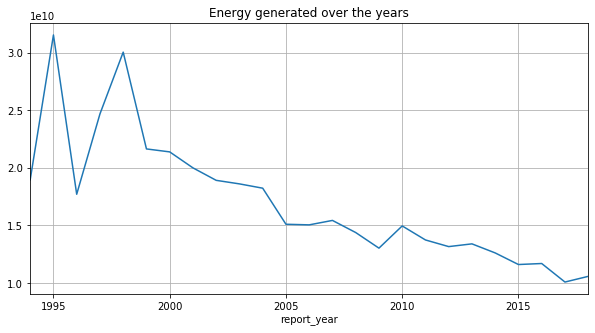

In [334]:
plt.figure(figsize=(10,5))
group_energy_by_year  = utility_data.groupby('report_year')['mmbtu_produced'].sum()
group_energy_by_year.plot(title='Energy generated over the years')
plt.grid(True)
#plt.title('Energy generated over the years')


There has been a gradual but significant decline in the amount of energy produced over the years. What is responsible for this? Let's plot a graph showing the various contributions of energy by the different fuel sources.

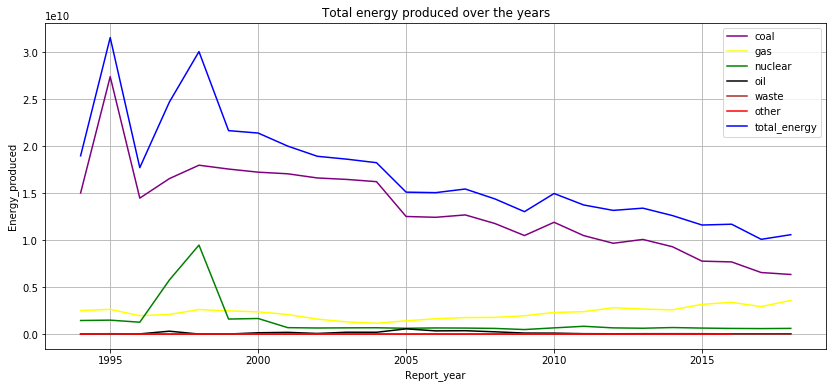

In [335]:
years = list(utility_data['report_year'].unique())
colors= {'oil': 'black', 'gas':'yellow','waste':'brown','nuclear':'green','other': 'red','coal':'purple'}

plt.figure(figsize=(14,6))
for fuel in fuel_type:
    #print(fuel_type)
    plt.plot(energy_produced[fuel].index, energy_produced[fuel], color= colors[fuel],label=fuel)
plt.plot(group_energy_by_year.index, group_energy_by_year,color= 'blue', label='total_energy')
plt.xlabel('Report_year')
plt.ylabel('Energy_produced')
plt.grid(True)
plt.title('Total energy produced over the years')
plt.legend()
plt.show()

From the plot above we can see that the line for total energy produced closely follows the shape of the 'coal' line while other energy sources remained fairly the same or experienced a very small growth in energy production. Hence, Coal was majorly responsible for the decline in the energy produced.

What caused this decline in the amount of energy produced by coal? was it due to cost? depletion in coal resources? or was the initial productionn of energy by coal inefficient and hence underutilized by citizens leading to the decline in production? or has the demand for energy declined?

We can see from our earlier plot, that though coal remains the number one source of energy generation, the energy produced by coal was very sensitive to the avg_cost_per_mmbtu which refers to the cost of producint 1 cost of energy. This cost has significantly increased over the years.
Hence, it surely is a major factor in the energy depletion.

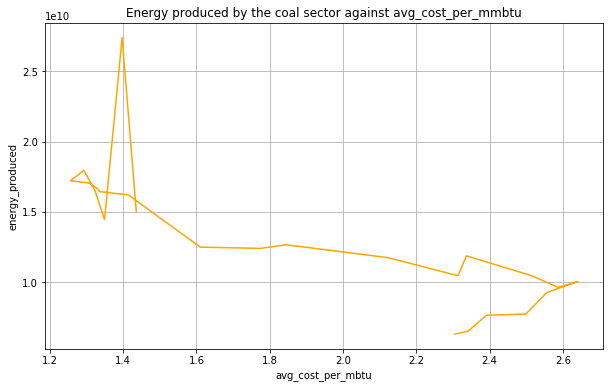

In [310]:
plt.figure(figsize=(10,6))
plt.plot(avg_cost_per_mmbtu['coal'],energy_produced['coal'], color= 'orange')
plt.xlabel('avg_cost_per_mbtu')
plt.ylabel('energy_produced')
plt.grid(True)
plt.title('Energy produced by the coal sector against avg_cost_per_mmbtu')
plt.show()

we see that as the cost initially decreased the energy produced peaked then started to drop as the cost increased.

- Highlight the competitiveness of renewable electricity

Renewable sources of energy in this data will be assumed to include waste and 'others' category as 'others' should contain other renewable sources like wind,hydro,solar etc.
How have these renewable sources of energy faired in the midst of other fuel types in terms of cost, energy generation and use over the years? 
Are they gaining power in terms of energy production increase as compared to other fuel_types?
If so, apart from the enviromental problems they seek to solve, has the cost significantly increased their use?

From the energy plot above :
For the waste fuel type we saw an general increase in adoption and hence eenergy production from 2001 despite rising fuel_cost. However, the 'others' source experienced a drop in the energy produced from 2003.
Now, lets calculate and plot the percentage energy contributed by the renewble source of energy over the years.

In [144]:
total_energy_per_year = utility_data.groupby('report_year')['mmbtu_produced'].sum()
renewable_plants = utility_data[(utility_data['fuel_type_code_pudl']== 'waste') | (utility_data['fuel_type_code_pudl'] == 'other')]
renewable_source = renewable_plants.groupby('report_year')['mmbtu_produced'].sum()
waste = renewable_plants[renewable_plants['fuel_type_code_pudl'] == 'waste'].groupby('report_year')['mmbtu_produced'].sum()
#print(renewable_source.head()/total_energy_per_year.head())


renewable_source = renewable_source/total_energy_per_year * 100
waste = waste/total_energy_per_year * 100

Text(0, 0.5, 'Enery production percentage by renewable fuel')

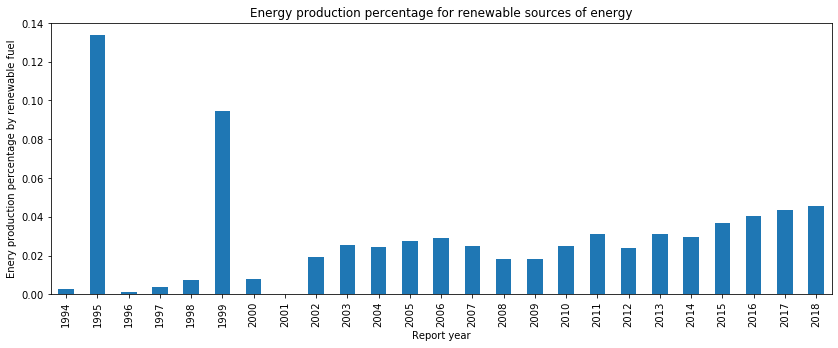

In [338]:
#plot percentage energy generation for the renewable source sector
renewable_source.plot(kind='bar',figsize=(14,5), title='Energy production percentage for renewable sources of energy')
plt.xlabel('Report year')
plt.ylabel('Enery production percentage by renewable fuel')


Text(0.5, 1.0, 'Energy production percentage for waste fuel')

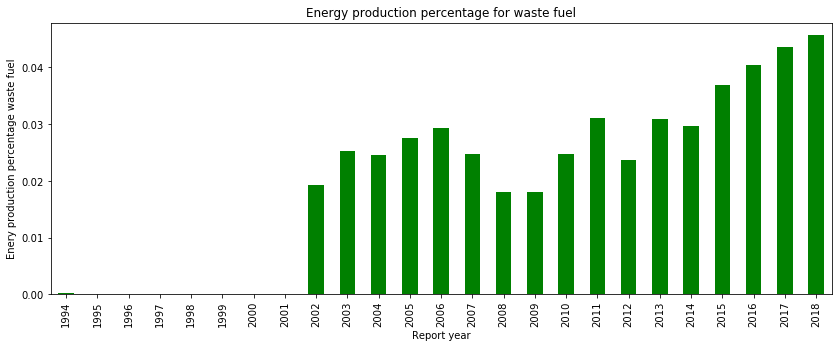

In [146]:
#plot percentage energy generation by the waste sector
waste.plot(kind='bar',figsize=(14,5),color='green')
plt.xlabel('Report year')
plt.ylabel('Enery production percentage waste fuel')
plt.title('Energy production percentage for waste fuel')

We see that basically no energy was generated before 2002 for wastes though little energy was being generated from other renewable sources. We also see that though the percentage energy production for renewable soures of energy has been on the rise , it still accounts for a very small percentage (< 0.05%) of the energy production by the whole power sector. This highlights that the renewable sector offers a very insignificant competition and still remains grossly under-utilized and has mostly been that way.

Now, let's make a dynamic bar chart for the energy production (representing each source) over the years.

In [183]:
fuel_types = list(fuel_sources.keys())
fuel_types.append('other')
fuel_type_perc_production = {}
fuel_type_perc_production['waste'] = list(waste)
for fuel_type in fuel_types:
    if fuel_type != 'waste':
        fuel_type_perc_production[fuel_type] = list(utility_data[utility_data['fuel_type_code_pudl'] == fuel_type].groupby('report_year')['mmbtu_produced'].sum()/total_energy_per_year * 100)     

In [228]:
#lets map index to a specific year:
year_to_index = { year : years.index(year) for year in years}
x_index = range(0, len(fuel_type_perc_production.keys()))

#Function to plot a bar chart to represent values over the years.
def energy_percentage(year):
    index= year_to_index[year]
    tick_label=[]
    y_value = []
    for fuel_type, value in fuel_type_perc_production.items():
        tick_label.append(fuel_type)
        y_value.append(value[index])
    plt.figure(figsize=(10,5))   
    plt.bar(x_index, y_value, tick_label=tick_label, color=colors.values())
    plt.xlabel('Fuel_sources')
    plt.ylabel('Energy production perc (%)')
    plt.grid(True)
    plt.title('Energy contribution by the different power sector')
    

In [229]:
interact(energy_percentage, year=(1994,2018,1))

interactive(children=(IntSlider(value=2006, description='year', max=2018, min=1994), Output()), _dom_classes=(…

<function __main__.energy_percentage(year)>

From the dynamic bar chart above, we can see the various contribution by the different energy sources. The contribution of the renewable sources of energy are not visible at all in the graph highlighting their insignificant contribution. Even in 2018, coal still accounts for about 60% of the energy production in america, gas accounts for about 33% of production, nuclear accounts for about 7% of production.


Now, lets make a pie chart.

In [320]:
#plot a pie chart.
def create_pie_chart(year):
    index= year_to_index[year]
    label=[]
    values = []
    for fuel_type, value in fuel_type_perc_production.items():
        label.append(fuel_type)
        values.append(value[index])
    labels = ['Javascript','HTML/CSS','SQL','Python','Java']
    plt.pie(values, labels=label ,wedgeprops={'edgecolor': 'blue'},radius = 2, rotatelabels= True,shadow=True,autopct='%1.1f%%',startangle=90)
    plt.show()
    
interact(create_pie_chart, year = (1994,2018,1))

interactive(children=(IntSlider(value=2006, description='year', max=2018, min=1994), Output()), _dom_classes=(…

<function __main__.create_pie_chart(year)>

We can see that the renewable source indeed accounts for a very small percentage throughout the years.

#   Data Summary
- The composition of power plants making for the total energy production belonged mainly to the coal, gas and oil sector.
- The top ten plants with the highest operating cost (using avg. cost per mmbtu) belonged to the renewable sources ,nuclear and oil in that order. It was reasoned that the renewable sources made the top of the list because there was a very significant,abrupt increase in cost from a very minimal level hence, increasing the average.
- The operating cost (avg cost per mmbtu) had a significant effect (inverse relationship) on the energy production by the various sectors.
- The total energy production has significantly declined over the years due mainly to a significant decline in energy production by the coal sector probably caused by a significant increase in average operating cost for coal plants.
- Coal accounted for the most of the energy production, followed by gas and oil. Renewable sources generated the least energy despite the overall low operating cost thought amount of energy produced by them has increased gradually over the years.
- Coal has always been the number one source of energy generation in america since 1994. Recent years saw an increase in the energy generated mainly by the gas and nuclear sectors while oil output has declined over the years.